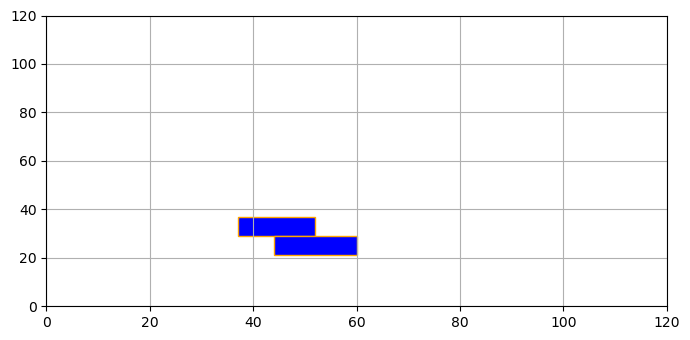

party!
{'xmin': 37, 'ymin': 29, 'width': 15, 'height': 8, 'clashes': {}, 'aversions': {}, 'inference': 0, 'connections': {}, 'turmoil': 0, 'wounds': []}
{'xmin': 44, 'ymin': 21, 'width': 16, 'height': 8, 'clashes': {}, 'aversions': {}, 'inference': 0, 'connections': {}, 'turmoil': 0, 'wounds': []}


In [67]:
from util import *

# a = generate_participant()

arena = {}

for i in range(2):
    arena[str(i)] = generate_participant()

plot_participants(arena)

calculate_overlap(arena['0'], arena['1'])

print(arena['0'])
print(arena['1'])

In [12]:
arena['1']

{'xmin': 54,
 'ymin': 34,
 'width': 18,
 'height': 14,
 'clashes': {},
 'aversions': {},
 'inference': 0,
 'connections': {},
 'turmoil': 0,
 'wounds': []}